# 7 - Exploring Baselines by Plots

This Journal documents the current baseline input files for PV_ICE claculator by graphing all the variable inputs.

Plots are also made for the upper and lower confidence limits of those variables. 

This journal is in development, with future improvements:
    - Improve ylabels so that it's a readable expression instead of the varible names. For the moment, reffer to the documentation to know the details of the different variables being plotted.
    - Updated upper and lower confidence limits to follow triangular distribution. For the moment, using the values of the sensitivity analysis.


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder =  str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines')
# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_ICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


## Select Module Baseline and Material baseline to Plot:

These are the current options in the baselines folder:

In [4]:
baselineoptions = ['US', 'WORLD']
materialoptions = ['glass', 'glass_bifacialTrend', 'silicon', 'silver', 'copper', 'aluminium_frames']


In [5]:
baselinewanted = 0
materialwanted = 0

MODULEBASELINE=r'..\baselines\baseline_modules_'+baselineoptions[baselinewanted]+'.csv'
MATERIAL =materialoptions[materialwanted]
MATERIALBASELINE=r'..\baselines\baseline_material_'+MATERIAL+'.csv'


## Create Simulation

In [6]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
#r1.createScenario(name='standard', file=os.path.join(baselinesfolder,  MODULEBASELINE))
r1.createScenario(name='standard', file=MODULEBASELINE)

r1.scenario['standard'].addMaterial(MATERIAL, file=MATERIALBASELINE)
r1.calculateMassFlow()


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


#### Generate variable list of data and material data. 

This journal plots only baselines, not generated results so it's not all columns after running the mass flow. The input data labels and units are kept intact in metdata so using that to set module keys and material keys

In [7]:
# module keys
keys = list(r1.scenario['standard'].metdata[0])
keys = keys[1::]
keys

['new_Installed_Capacity_[MW]',
 'mod_eff',
 'mod_reliability_t50',
 'mod_reliability_t90',
 'mod_degradation',
 'mod_lifetime',
 'mod_MFG_eff',
 'mod_EOL_collection_eff',
 'mod_EOL_collected_recycled',
 'mod_Repair',
 'mod_MerchantTail',
 'mod_Reuse']

In [8]:
# material keys
matkeys = list(r1.scenario['standard'].material[MATERIAL].materialmetdata)
matkeys = matkeys[1::]
matkeys

['mat_virgin_eff',
 'mat_massperm2',
 'mat_MFG_eff',
 'mat_MFG_scrap_Recycled',
 'mat_MFG_scrap_Recycling_eff',
 'mat_MFG_scrap_Recycled_into_HQ',
 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
 'mat_EOL_collected_Recycled',
 'mat_EOL_Recycling_eff',
 'mat_EOL_Recycled_into_HQ',
 'mat_EOL_RecycledHQ_Reused4MFG']

### Module Individual Plots by Key

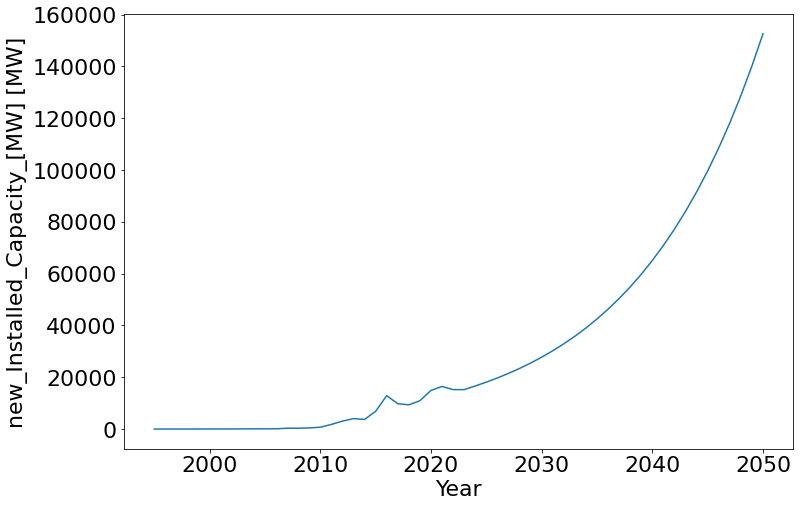

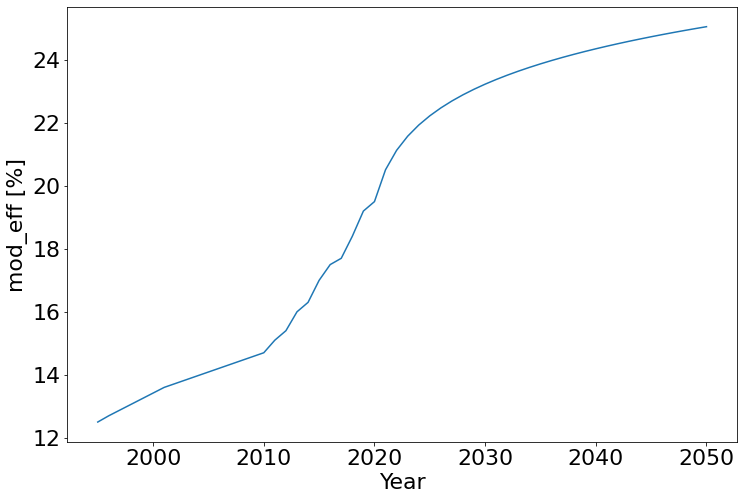

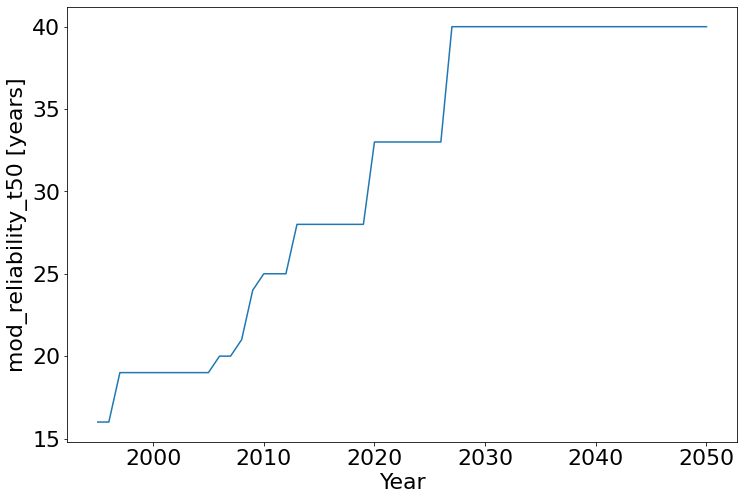

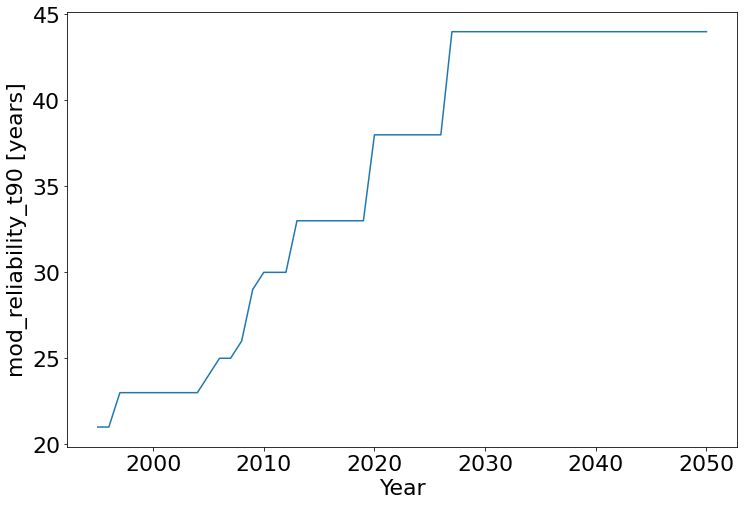

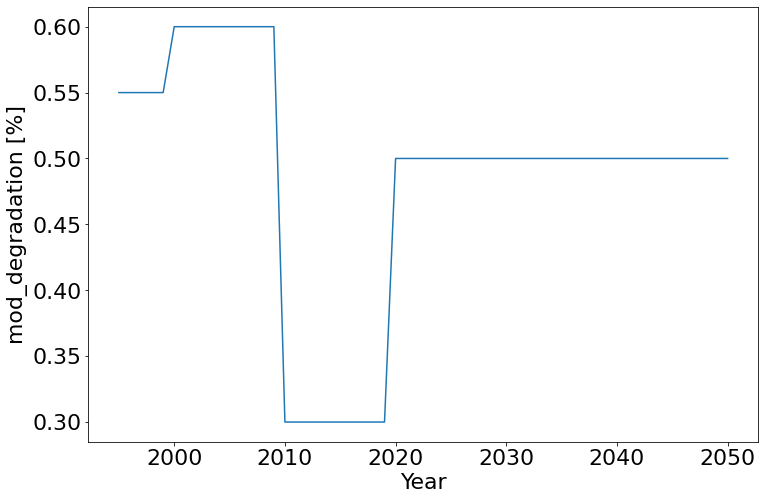

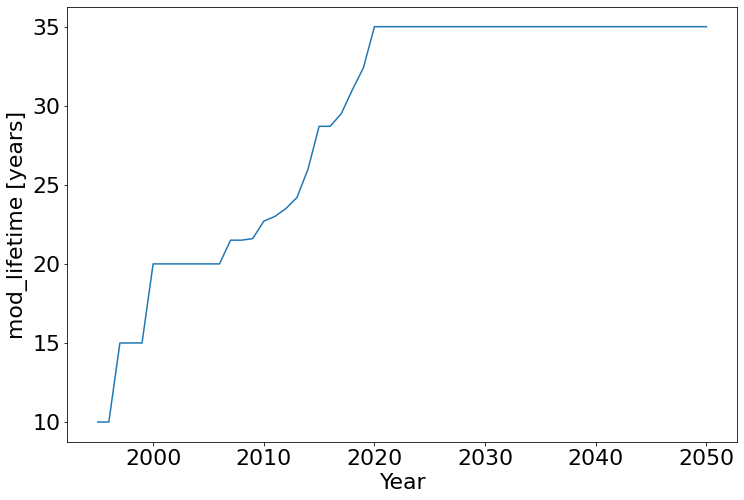

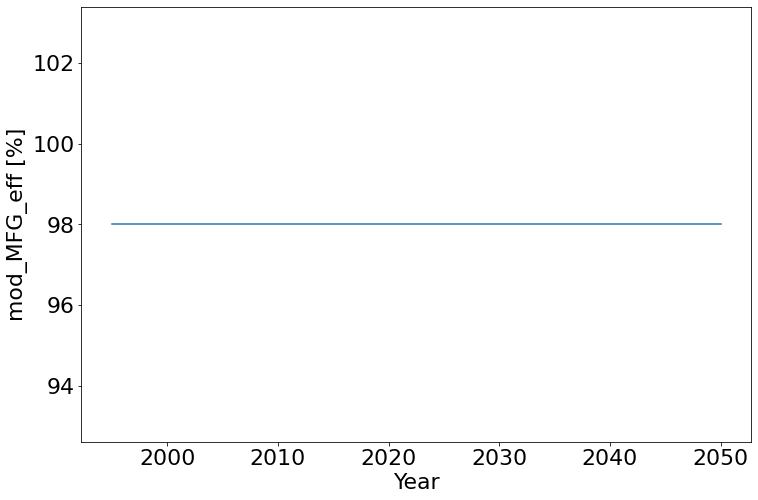

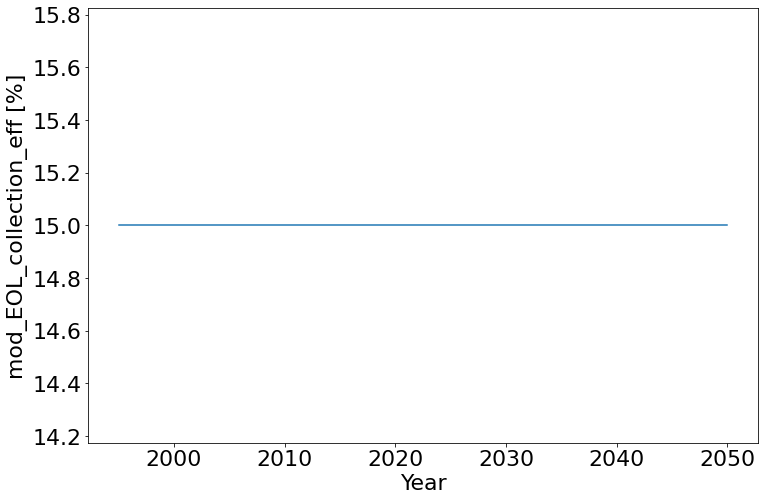

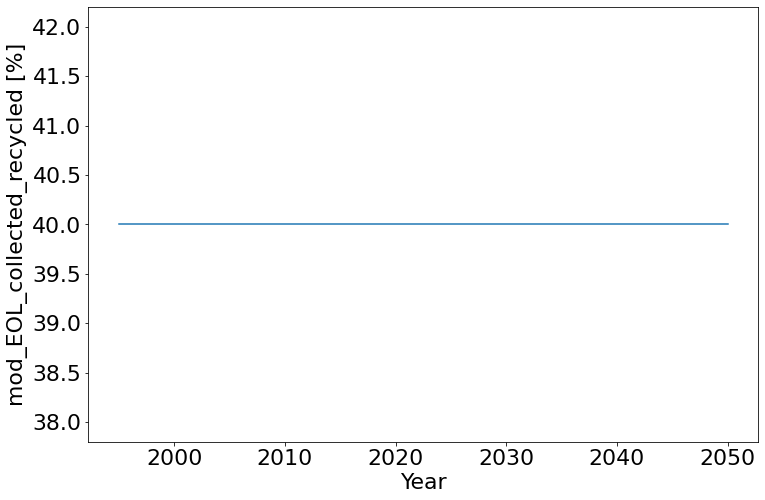

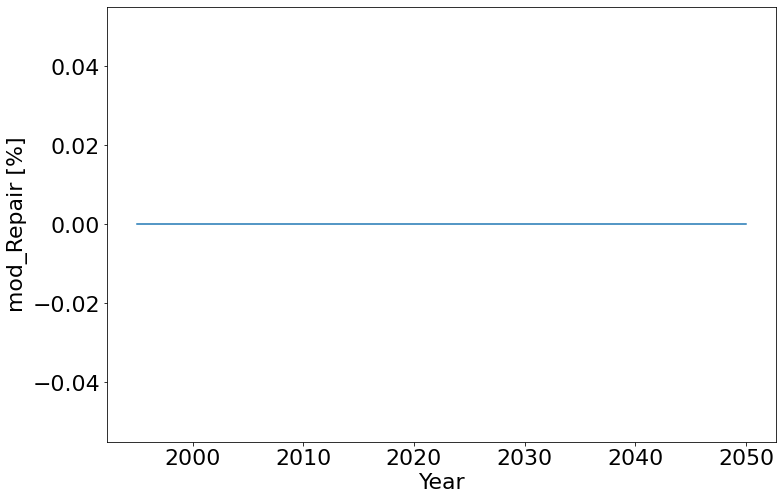

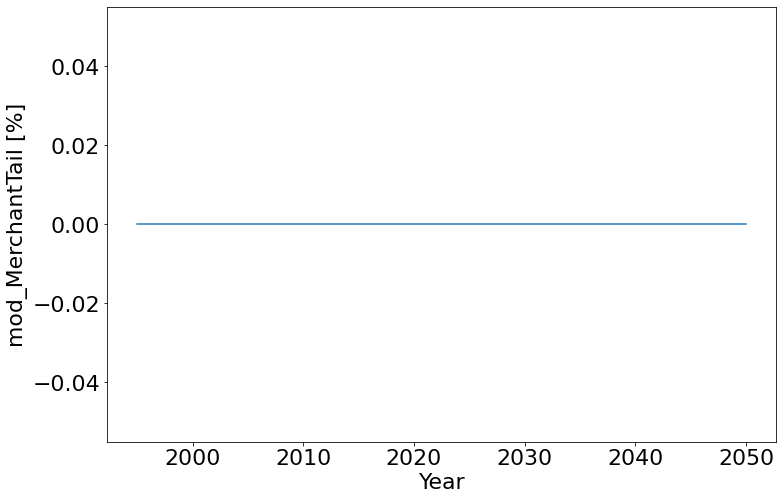

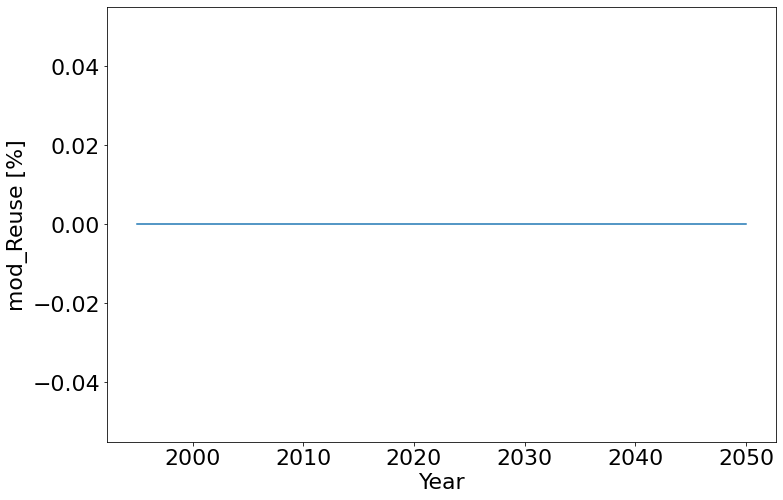

In [9]:
for k in keys:
    plt.figure()
    plt.plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data[k])
    plt.xlabel('Year')
    plt.ylabel(k+' ['+r1.scenario['standard'].metdata[0][k]+']')

### Combined Plot For All Keys

#### Module Keys

(1995.0, 2050.0)

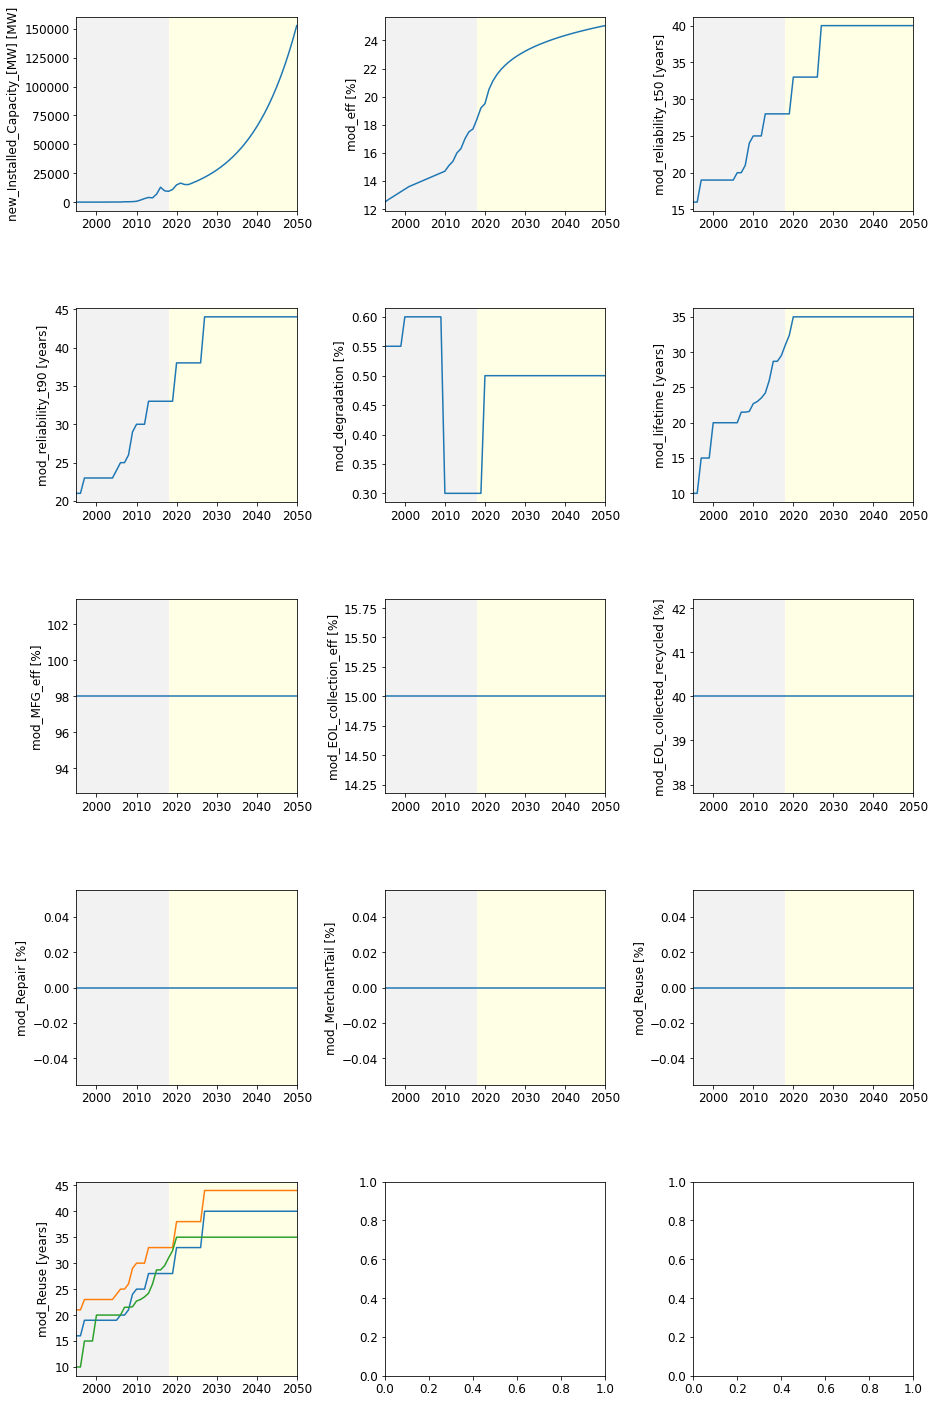

In [10]:
prows=int(np.ceil((len(keys)+1)/3))

plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(prows,3, figsize=(15, prows*5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.4)
axs = axs.ravel()

for i in range(0, len(keys)):
    k = keys[i]
    axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data[k])
    axs[i].set_ylabel(k+' ['+r1.scenario['standard'].metdata[0][k]+']')   
    axs[i].axvspan(1995, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    axs[i].set_xlim(1995, 2050)

    
i +=1
axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_reliability_t50'])
axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_reliability_t90'])
axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_lifetime'])
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].metdata[0]['mod_reliability_t50']+']')   
axs[i].axvspan(1995, 2018, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
axs[i].set_xlim(1995, 2050)

axs[i].set_xlim(1995, 2050)

#### Material Keys

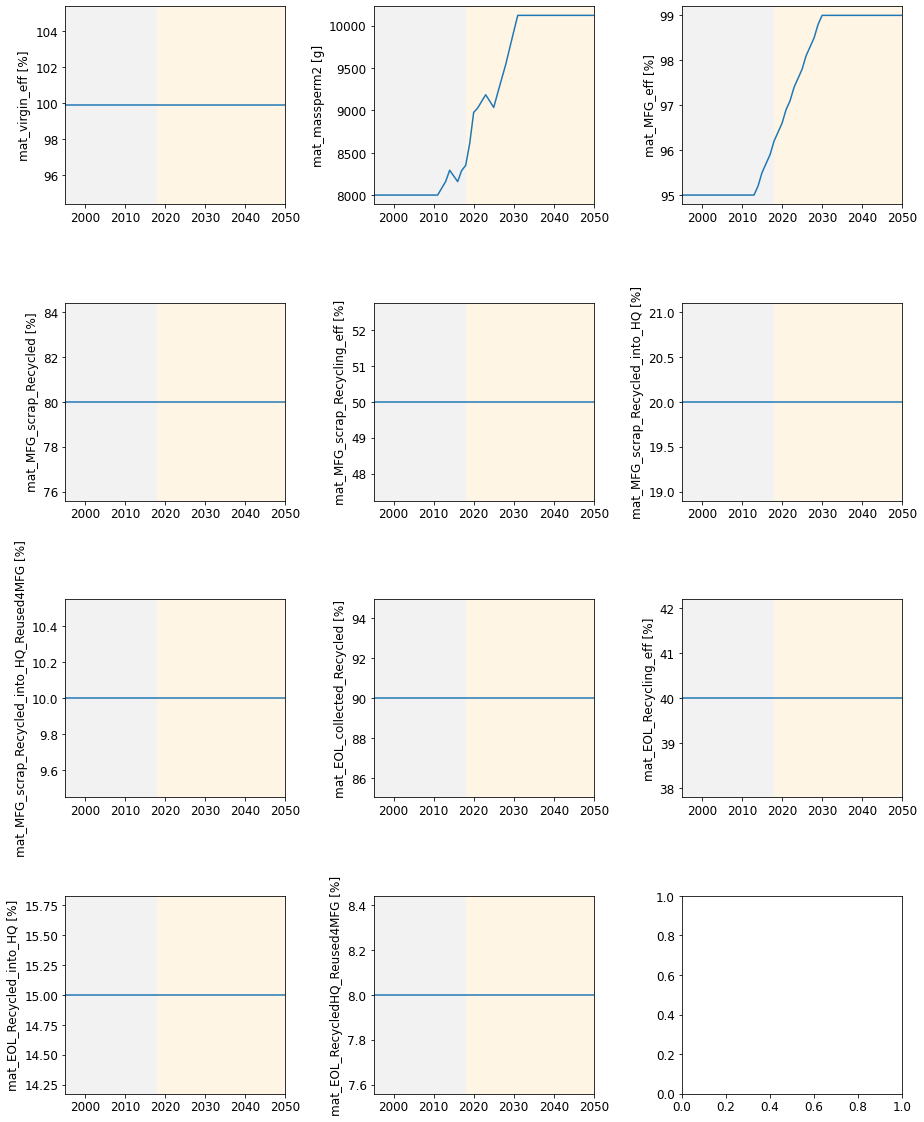

In [11]:
prows=int(np.ceil((len(matkeys)+1)/3))

plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(prows,3, figsize=(15, prows*5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.4)
axs = axs.ravel()

for i in range(0, len(matkeys)):
    k = matkeys[i]
    axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].material[MATERIAL].materialdata[k])
    axs[i].set_ylabel(k+' ['+r1.scenario['standard'].material[MATERIAL].materialmetdata[k]+']')   
    axs[i].axvspan(1995, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='orange', alpha=0.1)
    axs[i].set_xlim(1995, 2050)


## Combined Plot with Levels of Confidence 

The following plots are organized in a custom manner, and include shaded areas marking the upper and lower limits of confidence.


#### Set Upper and Lower Limits


Note: at the moment the limits of confidence are marked as the sensitivities explored in the publication in progress. A tringular distribution with distinct limits will be updated at a later time.

In [12]:
upperlimit = {'new_Installed_Capacity_[MW]': 5,    # relative
 'mod_eff': 3,                                     # absolute
 'mod_reliability_t50': 5,                         # absolute
 'mod_reliability_t90': 5,                         # absolute
 'mod_degradation': 2,                             # absolute
 'mod_lifetime': 5,                                # absolute
 'mod_MFG_eff': 5,                                 # absolute
 'mod_EOL_collection_eff': 10,                     # absolute
 'mod_EOL_collected_recycled': 10,                 # absolute
 'mod_Reuse': 10,                             #absolute
 'mod_Repair':10}

lowerlimit = {'new_Installed_Capacity_[MW]': 5,        # relative
 'mod_eff': 3,                                     # absolute
 'mod_reliability_t50': 5,                         # absolute
 'mod_reliability_t90': 5,                         # absolute
 'mod_degradation': 2,                             # absolute
 'mod_lifetime': 5,                                # absolute
 'mod_MFG_eff': 5,                                 # absolute
 'mod_EOL_collection_eff': 10,                     # absolute
 'mod_EOL_collected_recycled': 10,                 # absolute
 'mod_Reuse': 10,                             #absolute
 'mod_Repair':10}

In [13]:

matupperlimit = {'mat_virgin_eff': 10,               # absolute
 'mat_massperm2': 10,                                # relative
 'mat_MFG_eff': 10,                                  # absolute
 'mat_MFG_scrap_Recycled': 10,                       # absolute
 'mat_MFG_scrap_Recycling_eff': 10,                  # absolute
 'mat_MFG_scrap_Recycled_into_HQ': 10,               # absolute
 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG': 10,    # absolute
 'mat_EOL_collected_Recycled': 10,                   # absolute
 'mat_EOL_Recycling_eff': 10,                        # absolute
 'mat_EOL_Recycled_into_HQ': 10,                     #absolute
 'mat_EOL_RecycledHQ_Reused4MFG':10}


matlowerlimit = {'mat_virgin_eff': 10,                  # absolute
 'mat_massperm2': 10,                                # relative
 'mat_MFG_eff': 10,                                  # absolute
 'mat_MFG_scrap_Recycled': 10,                       # absolute
 'mat_MFG_scrap_Recycling_eff': 10,                  # absolute
 'mat_MFG_scrap_Recycled_into_HQ': 10,               # absolute
 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG': 10,    # absolute
 'mat_EOL_collected_Recycled': 10,                   # absolute
 'mat_EOL_Recycling_eff': 10,                        # absolute
 'mat_EOL_Recycled_into_HQ': 10,                     #absolute
 'mat_EOL_RecycledHQ_Reused4MFG':10}

#### Module Plots with Levels of Confidence

First creating a key subset keys so that lifetime-related ones are plotted together

In [14]:
keys = ['new_Installed_Capacity_[MW]',
 'mod_eff',
 'mod_degradation',
 'mod_MFG_eff',
 'mod_EOL_collection_eff',
 'mod_EOL_collected_recycled',
 'mod_Reuse',
 'mod_Repair']

(1995.0, 2050.0)

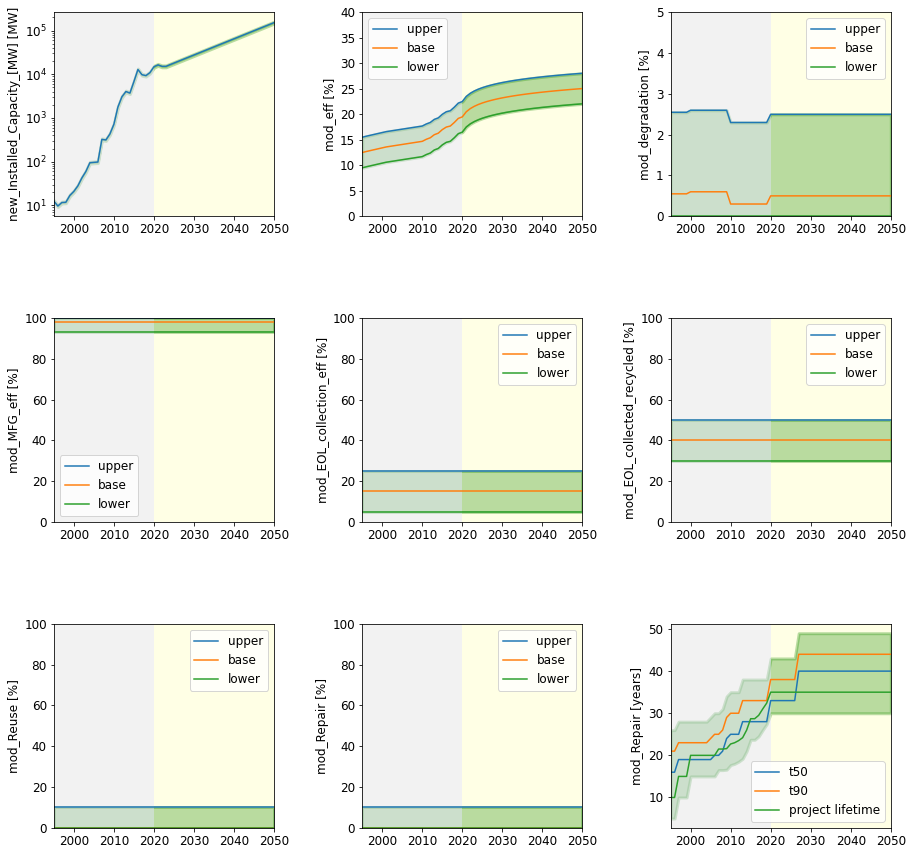

In [15]:
# Plotting
prows=int(np.ceil((len(keys)+1)/3))

plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(prows,3, figsize=(15, prows*5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.4)
axs = axs.ravel()

x = r1.scenario['standard'].data.year

# Installations
i = 0
k = keys[i]
base =  r1.scenario['standard'].data[k]
upperlim = base*(1+(upperlimit[k])/100)
lowerlim = base*(1-(lowerlimit[k])/100)
axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2020, 2050.5, facecolor='yellow', alpha=0.1)
axs[i].set_xlim(1995, 2050)
axs[i].plot(r1.scenario['standard'].data.year, base)
axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
axs[i].set_yscale('log')
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].metdata[0][k]+']')   


# Efficiency
i = 1
k = keys[i]
base =  r1.scenario['standard'].data[k]
upperlim = (base+upperlimit[k]).clip(lower=0.0, upper=100.0)
lowerlim = (base-lowerlimit[k]).clip(lower=0.0, upper=100.0)
axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2020, 2050.5, facecolor='yellow', alpha=0.1)
axs[i].plot(x, upperlim, label='upper')
axs[i].plot(x, base, label='base')
axs[i].plot(x, lowerlim, label='lower')
axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].metdata[0][k]+']')   
axs[i].set_xlim(1995, 2050)
axs[i].set_ylim(0.0, 40.0)
axs[i].legend()

# Degradation
i = 2
k = keys[i]
base =  r1.scenario['standard'].data[k]
upperlim = (base+upperlimit[k]).clip(lower=0.0, upper=100.0)
lowerlim = (base-lowerlimit[k]).clip(lower=0.0, upper=100.0)
axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2020, 2050.5, facecolor='yellow', alpha=0.1)
axs[i].plot(x, upperlim, label='upper')
axs[i].plot(x, base, label='base')
axs[i].plot(x, lowerlim, label='lower')
axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].metdata[0][k]+']')   
axs[i].set_xlim(1995, 2050)
axs[i].set_ylim(0.0, 5.0)
axs[i].legend()

    
for i in range(3, len(keys)):
    k = keys[i]
    base =  r1.scenario['standard'].data[k]
    upperlim = (base+upperlimit[k]).clip(lower=0.0, upper=100.0)
    lowerlim = (base-lowerlimit[k]).clip(lower=0.0, upper=100.0)
    axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2020, 2050.5, facecolor='yellow', alpha=0.1)
    axs[i].plot(x, upperlim, label='upper')
    axs[i].plot(x, base, label='base')
    axs[i].plot(x, lowerlim, label='lower')
    axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
    axs[i].set_ylabel(k+' ['+r1.scenario['standard'].metdata[0][k]+']')   
    axs[i].set_xlim(1995, 2050)
    axs[i].set_ylim(0.0, 100.0)
    axs[i].legend()



    
i +=1
base =  r1.scenario['standard'].data[k]
upperlim = r1.scenario['standard'].data['mod_reliability_t90']+5
lowerlim = r1.scenario['standard'].data['mod_lifetime']-5
axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_reliability_t50'], label='t50')
axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_reliability_t90'], label='t90')
axs[i].plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_lifetime'], label='project lifetime')
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].metdata[0]['mod_reliability_t50']+']')   
axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2020, 2050.5, facecolor='yellow', alpha=0.1)
axs[i].set_xlim(1995, 2050)
axs[i].legend()
axs[i].set_xlim(1995, 2050)



#### Material Level

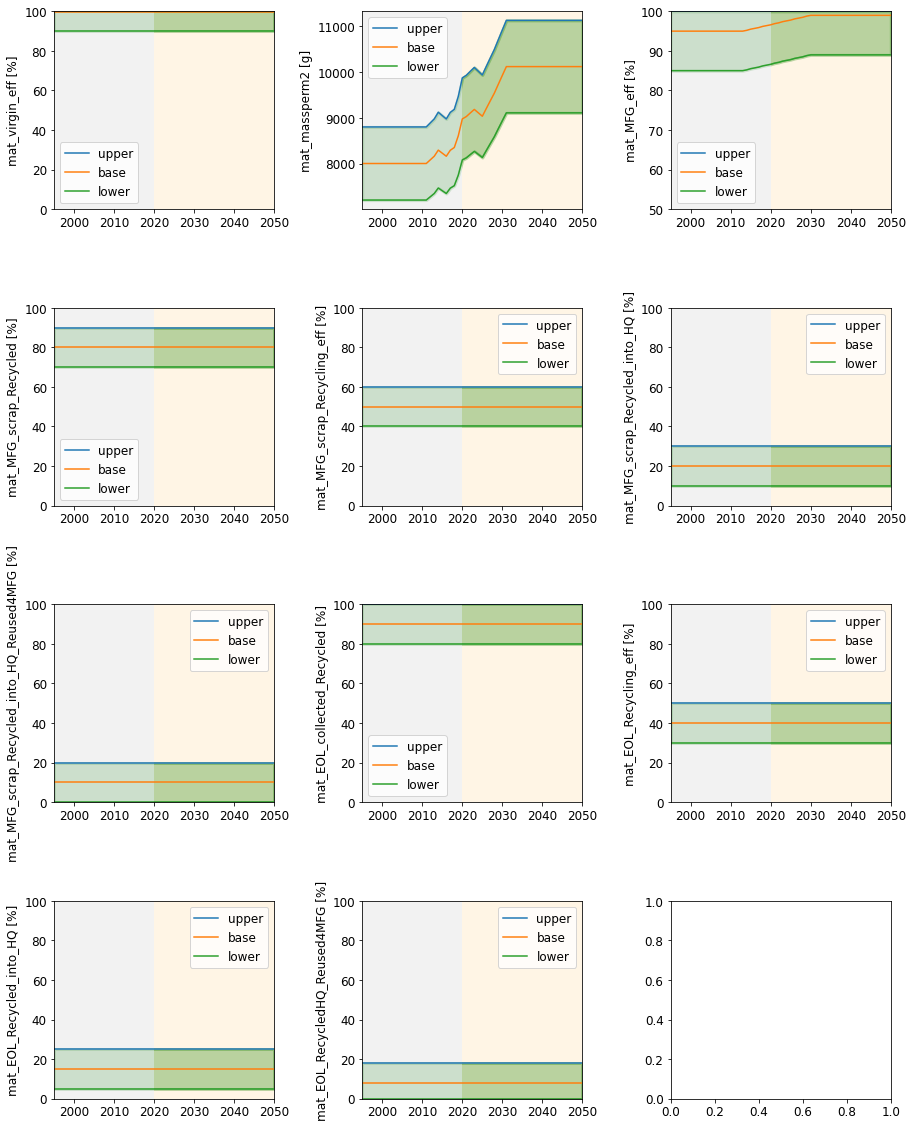

In [16]:
prows=int(np.ceil((len(matkeys)+1)/3))

plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(prows,3, figsize=(15, prows*5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.4)
axs = axs.ravel()

x = r1.scenario['standard'].data.year

# mat_virgin_eff
i = 0
k = matkeys[i]
base = r1.scenario['standard'].material[MATERIAL].materialdata[k]
upperlim = (base+matupperlimit[k]).clip(lower=0.0, upper=100.0)
lowerlim = (base-matlowerlimit[k]).clip(lower=0.0, upper=100.0)
axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2020, 2050.5, facecolor='orange', alpha=0.1)
axs[i].set_xlim(1995, 2050)
axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
axs[i].plot(x, upperlim, label='upper')
axs[i].plot(x, base, label='base')
axs[i].plot(x, lowerlim, label='lower')
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].material[MATERIAL].materialmetdata[k]+']')   
axs[i].set_ylim(0.0, 100.0)
axs[i].legend()


# mat_massperm2
i = 1
k = matkeys[i]
base = r1.scenario['standard'].material[MATERIAL].materialdata[k]
upperlim = base*(1+(matupperlimit[k])/100)
lowerlim = base*(1-(matlowerlimit[k])/100)
axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2020, 2050.5, facecolor='orange', alpha=0.1)
axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
axs[i].plot(x, upperlim, label='upper')
axs[i].plot(x, base, label='base')
axs[i].plot(x, lowerlim, label='lower')
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].material[MATERIAL].materialmetdata[k]+']')   
axs[i].set_xlim(1995, 2050)
#axs[i].set_ylim(0.0, 40.0)
axs[i].legend()

# mat_MFG_eff
i = 2
k = matkeys[i]
base = r1.scenario['standard'].material[MATERIAL].materialdata[k]
upperlim = (base+matupperlimit[k]).clip(lower=0.0, upper=100.0)
lowerlim = (base-matlowerlimit[k]).clip(lower=0.0, upper=100.0)
axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2020, 2050.5, facecolor='orange', alpha=0.1)
axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
axs[i].plot(x, upperlim, label='upper')
axs[i].plot(x, base, label='base')
axs[i].plot(x, lowerlim, label='lower')
axs[i].set_ylabel(k+' ['+r1.scenario['standard'].material[MATERIAL].materialmetdata[k]+']')   
axs[i].set_xlim(1995, 2050)
axs[i].set_ylim(50.0, 100.0)
axs[i].legend()

    
for i in range(3, len(matkeys)):
    k = matkeys[i]
    base = r1.scenario['standard'].material[MATERIAL].materialdata[k]
    upperlim = (base+matupperlimit[k]).clip(lower=0.0, upper=100.0)
    lowerlim = (base-matlowerlimit[k]).clip(lower=0.0, upper=100.0)
    axs[i].axvspan(1995, 2020, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2020, 2050.5, facecolor='orange', alpha=0.1)
    axs[i].fill_between(x, lowerlim, upperlim, color='g', lw=3, alpha=.3)
    axs[i].plot(x, upperlim, label='upper')
    axs[i].plot(x, base, label='base')
    axs[i].plot(x, lowerlim, label='lower')
    axs[i].set_ylabel(k+' ['+r1.scenario['standard'].material[MATERIAL].materialmetdata[k]+']')   
    axs[i].set_xlim(1995, 2050)
    axs[i].set_ylim(0.0, 100.0)
    axs[i].legend()



### 3x1 Plot of Module Relability and Efficiency

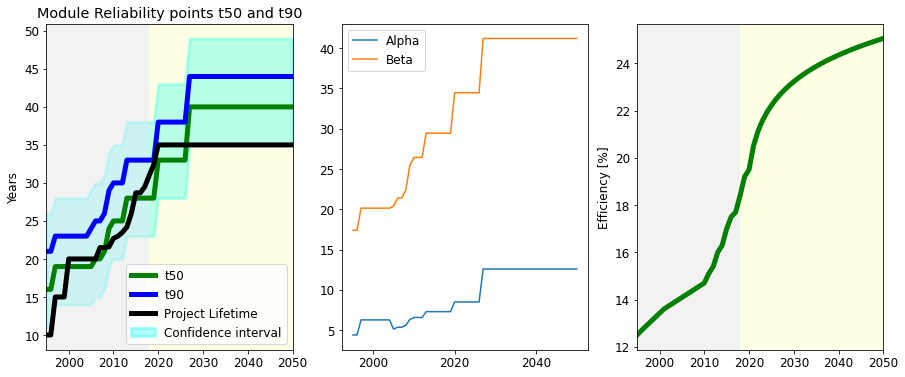

In [17]:
# 3x1 Plot of Module Relability and Efficiency

fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()

# T590 and T90
avgt= (r1.scenario['standard'].data['mod_reliability_t50']+r1.scenario['standard'].data['mod_reliability_t90'])/2.0
avgtmax = r1.scenario['standard'].data['mod_reliability_t90']+5
avgtmin = r1.scenario['standard'].data['mod_reliability_t50']-5

i = 0
axs[i].axvspan(1995, 2018, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
#axs[i].plot([],[],color='g', label='aluminum', linewidth=5)
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_reliability_t50'],color='g', label='t50', linewidth=5)
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_reliability_t90'],color='b', label='t90', linewidth=5)
axs[i].set_xlim([1995, 2050])
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_lifetime'],color='k', label='Project Lifetime', linewidth=5)

#axs[i].fill_between(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_reliability_t50'], r1.scenario['standard'].data['mod_reliability_t90'], 
#                   alpha= 0.3, color='cyan', lw=3)# , alpha=.6)

axs[i].fill_between(r1.scenario['standard'].data.year, avgtmin, avgtmax, 
                   alpha= 0.3, color='cyan', lw=3, label='Confidence interval')# , alpha=.6)
axs[i].set_ylabel('Years')
axs[i].set_title('Module Reliability points t50 and t90')
axs[i].legend()


# ALPHA AND BETA
i = 1
weibulls = r1.scenario['standard'].data.WeibullParams
weibulls = pd.DataFrame(weibulls.tolist())
axs[i].plot(r1.scenario['standard'].data.year,weibulls['alpha'])
axs[i].plot(r1.scenario['standard'].data.year,weibulls['beta'])
axs[i].legend(['Alpha', 'Beta'])


# EFFICIENCY
i=2
axs[i].axvspan(1995, 2018, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
#axs[i].plot([],[],color='g', label='aluminum', linewidth=5)
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_eff'],color='g', label='t50', linewidth=5)
axs[i].set_xlim([1995, 2050])
axs[i].set_ylabel('Efficiency [%]');
